In [83]:
import os
import csv

from collections import Counter

import numpy as np
import cv2

from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
COLORS = ['green', 'red', 'yellow', 'blue']

In [5]:
with open('../data/train.csv') as train_file:
    train_samples = list(csv.DictReader(train_file))
    train_samples = [{**sample, 'targets': sample.pop('Target').split()} for sample in train_samples]

In [20]:
train_samples[:10]

[{'Id': '00070df0-bbc3-11e8-b2bc-ac1f6b6435d0', 'targets': ['16', '0']},
 {'Id': '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
  'targets': ['7', '1', '2', '0']},
 {'Id': '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0', 'targets': ['5']},
 {'Id': '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0', 'targets': ['1']},
 {'Id': '001838f8-bbca-11e8-b2bc-ac1f6b6435d0', 'targets': ['18']},
 {'Id': '001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0', 'targets': ['0']},
 {'Id': '0020af02-bbba-11e8-b2ba-ac1f6b6435d0', 'targets': ['25', '2']},
 {'Id': '002679c2-bbb6-11e8-b2ba-ac1f6b6435d0', 'targets': ['0']},
 {'Id': '00285ce4-bba0-11e8-b2b9-ac1f6b6435d0', 'targets': ['2', '0']},
 {'Id': '002daad6-bbc9-11e8-b2bc-ac1f6b6435d0', 'targets': ['7']}]

In [25]:
all_targets = [target for sample in train_samples for target in sample['targets']]
label_counts = Counter(all_targets)
label_counts.most_common()

[('0', 12885),
 ('25', 8228),
 ('21', 3777),
 ('2', 3621),
 ('23', 2965),
 ('7', 2822),
 ('5', 2513),
 ('4', 1858),
 ('3', 1561),
 ('19', 1482),
 ('1', 1254),
 ('11', 1093),
 ('14', 1066),
 ('6', 1008),
 ('18', 902),
 ('22', 802),
 ('12', 688),
 ('13', 537),
 ('16', 530),
 ('26', 328),
 ('24', 322),
 ('17', 210),
 ('20', 172),
 ('8', 53),
 ('9', 45),
 ('10', 28),
 ('15', 21),
 ('27', 11)]

In [89]:
{label: count / len(all_targets) for label, count in label_counts.most_common()}

{'0': 0.25373163719428143,
 '25': 0.16202591469418298,
 '21': 0.074376747666496,
 '2': 0.07130479303690283,
 '23': 0.05838682997912646,
 '7': 0.05557087156866606,
 '5': 0.049486038360048834,
 '4': 0.03658776731912883,
 '3': 0.030739238312787995,
 '19': 0.029183568981135048,
 '1': 0.0246937891378835,
 '11': 0.021523374424008507,
 '14': 0.020991689968886614,
 '6': 0.01984955299121736,
 '18': 0.017762199204442518,
 '22': 0.015792997518805876,
 '12': 0.013548107597180102,
 '13': 0.010574613051868773,
 '16': 0.010436768933874208,
 '26': 0.006458981528888188,
 '24': 0.00634082942774999,
 '17': 0.00413532353983695,
 '20': 0.0033870268992950256,
 '8': 0.0010436768933874208,
 '9': 0.0008861407585364893,
 '10': 0.00055137647197826,
 '15': 0.000413532353983695,
 '27': 0.0002166121854200307}

In [88]:
target_counts = Counter([len(sample['targets']) for sample in train_samples])
target_counts.most_common()

[(1, 15126), (2, 12485), (3, 3160), (4, 299), (5, 2)]

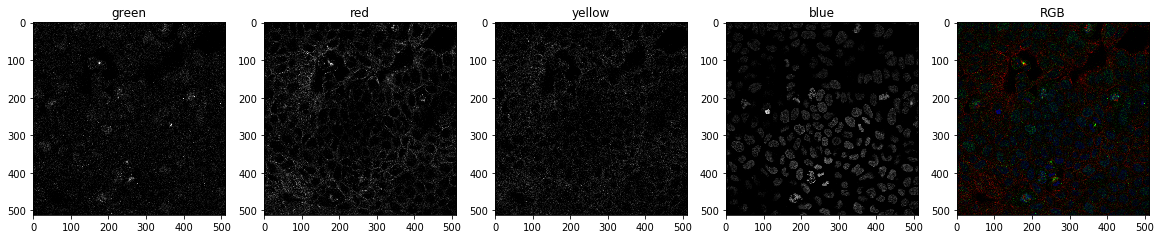

In [87]:
channels = [cv2.imread(f'../data/train/{train_samples[0]["Id"]}_{color}.png', cv2.IMREAD_GRAYSCALE) 
                   for color in COLORS]

plt.figure(figsize=(20, 10))
for i, channel in enumerate(channels):
    plt.subplot(1, len(COLORS) + 1, i + 1)
    plt.title(COLORS[i])
    plt.imshow(channel, cmap='gray')

plt.subplot(1, len(COLORS) + 1, len(COLORS) + 1)
plt.title('RGB')
plt.imshow(cv2.merge((channels[1], channels[0], channels[3])))

plt.show()